# Bike Sharing Assignment
Problem Statement :

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental 
and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes 
in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as 
the ongoing lockdown due to corona pandemic comes to end.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily
bike demands across the American market based on some factors.

In [45]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import pandas as pd

In [47]:
bike_data= pd.read_csv("day.csv")

In [48]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [49]:
bike_data.shape

(730, 16)

In [50]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [51]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [52]:
#Create a value_counts of the  dataframe, without the 'instant' column as it indecates row index 


bike_dummy=bike_data.iloc[:,1:16]

In [53]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 


1    504
0    226
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 


32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
   

Removing redundant & unwanted columns Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could drop this column.

casual & registered: we will remove those columns as cnt column has addition of both features

In [54]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [55]:
# removing unwanted columns 
Remove_cols = ['instant','dteday','casual', 'registered']

In [56]:
bike_data.drop(labels=Remove_cols,axis=1,inplace=True)

In [57]:
bike_data.shape

(730, 12)

In [58]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it Here's where you'll also identify 
if some predictors directly have a strong association with the outcome variable We'll 
visualise our data using matplotlib and seaborn.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
num_data =bike_data [[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

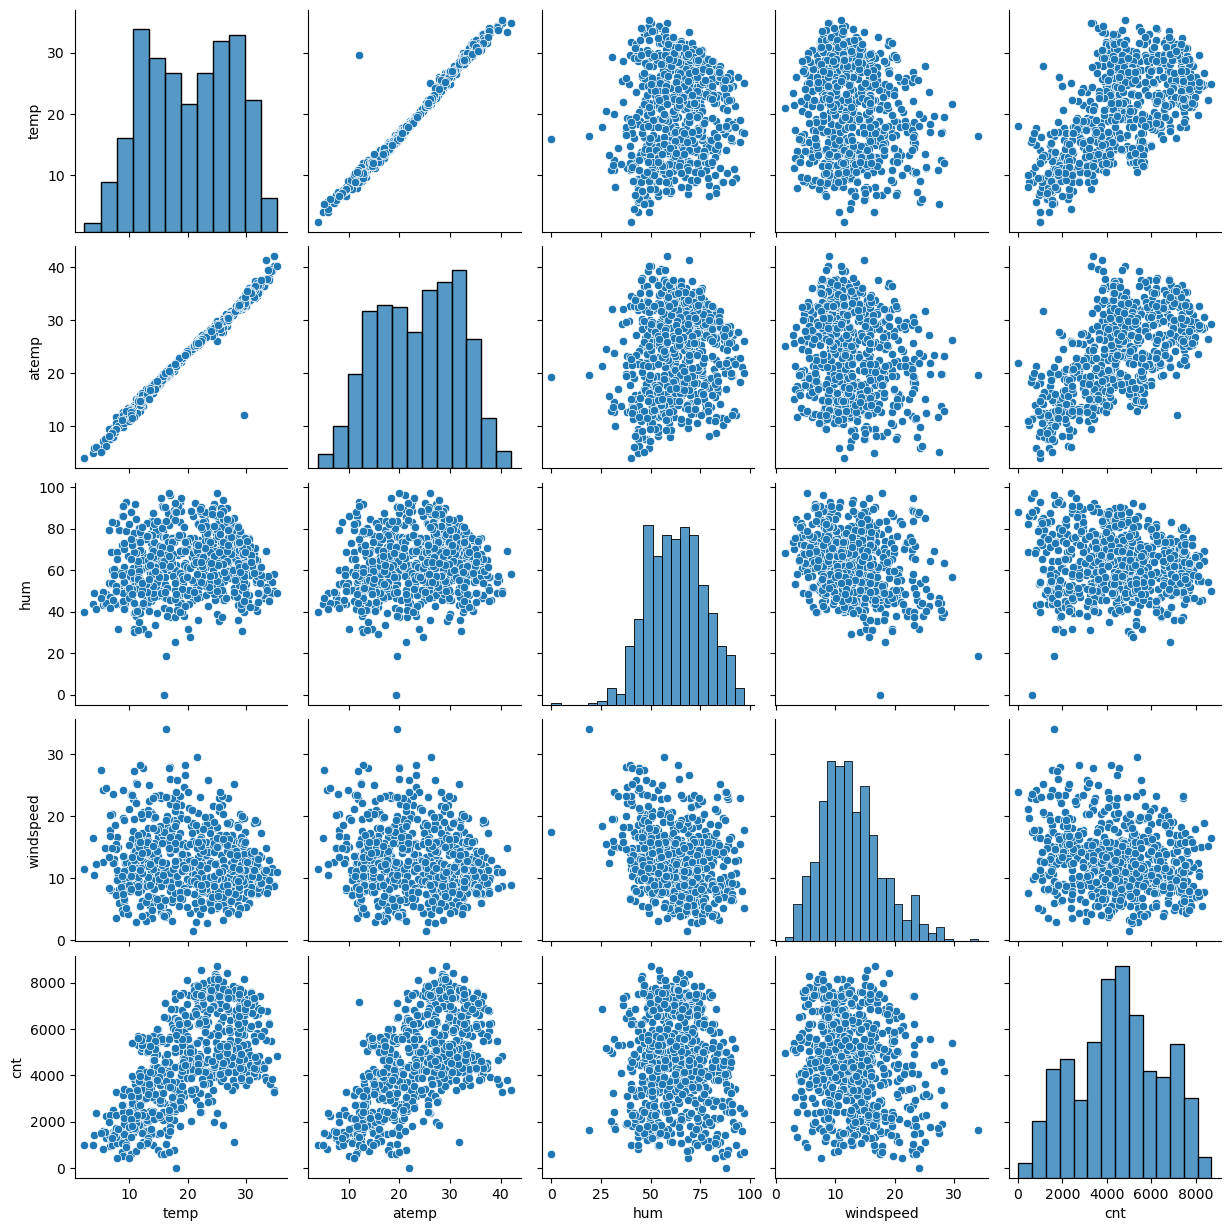

In [61]:
sns.pairplot(num_data)
plt.show()


#Insights

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

# Visualising Catagorical Variables

In [62]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


there are 7 categorical features

---season, yr, mnth, holiday, weekday, workingday, weathersit

Build boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' 
to validate there relationship with target variable

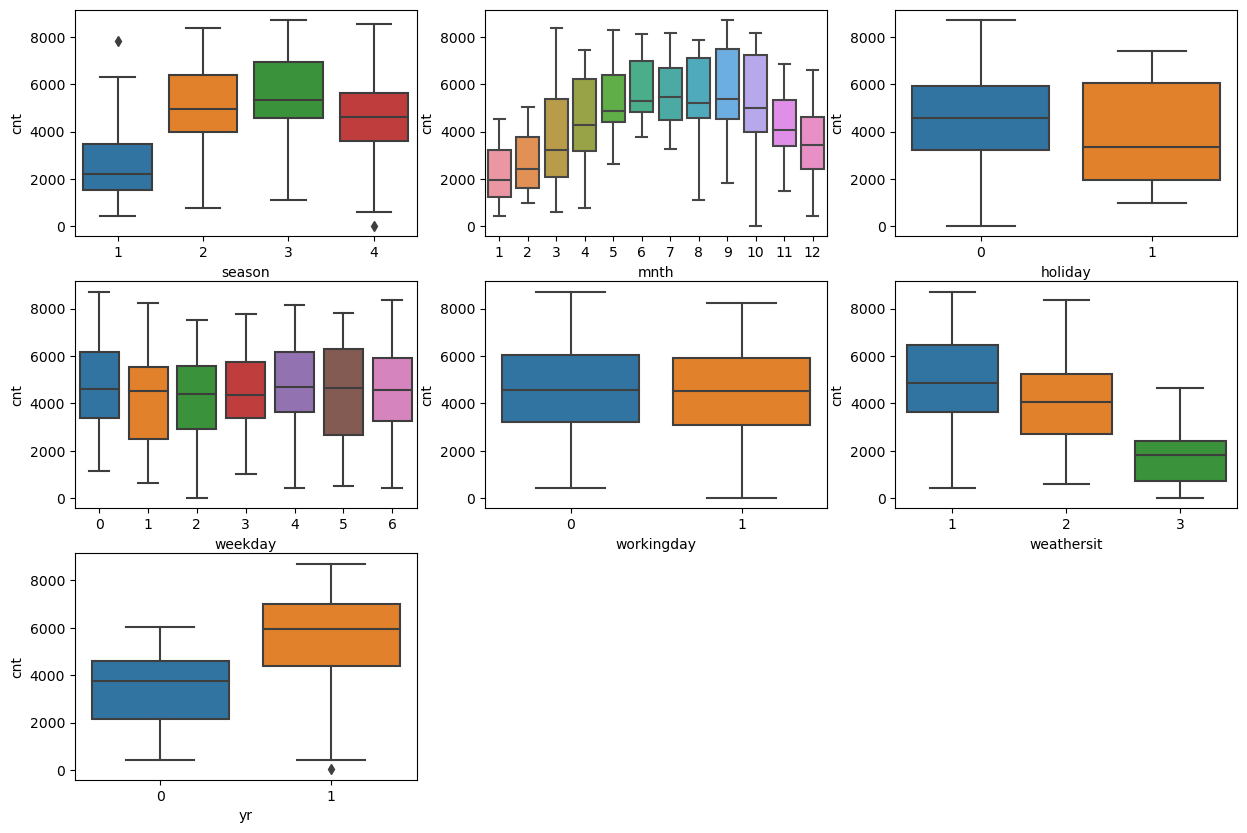

In [63]:
plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

# Insights
here were 7 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

1)season: Maximum bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4.This indicates, season does show some trend and can be a good predictor

2)mnth: The bike booking were happening in the months 5,6,7,8,9 and 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

3)holiday: Maximum number of bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

4)weekday:weekday variable shows very close trend of total booking on all days of the week having their independent medians between 5000 bookings. This variable can have some or no influence towards the predictor.We will check at the time of building the model.

5)workingday: Almost similar bike booking were happening in ‘workingday’ or 'non workingday' with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday may not be a good predictor for the dependent variable

6)weathersit: Maximum booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years).This was followed by weathersit2 with close to 4000 booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

7)yr:Mximum booking were happenned in the year 2019 compare to yr 2018 however it may not have effect on predictive modeling.

# Step 3: Preparing data for modeling

Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [64]:
# Check the datatypes before convertion
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [65]:
# Convert to 'category' data type

bike_data['season']=bike_data['season'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')



In [66]:
# Check the datatypes after the convertion
bike_data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [67]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_data = pd.get_dummies(bike_data, drop_first=True)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [68]:
bike_data.shape

(730, 30)

SPLITTING THE DATA¶

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 



We will use train_test_split method from sklearn package for this

In [69]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_data, train_size = 0.70,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Verify the info and shape of the dataframes after split:

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null  

# STEP 4: EXPLORATORY DATA ANALYSIS
We need to perform the EDA on TRAINING (df_train) Dataset

Correlation Matrix

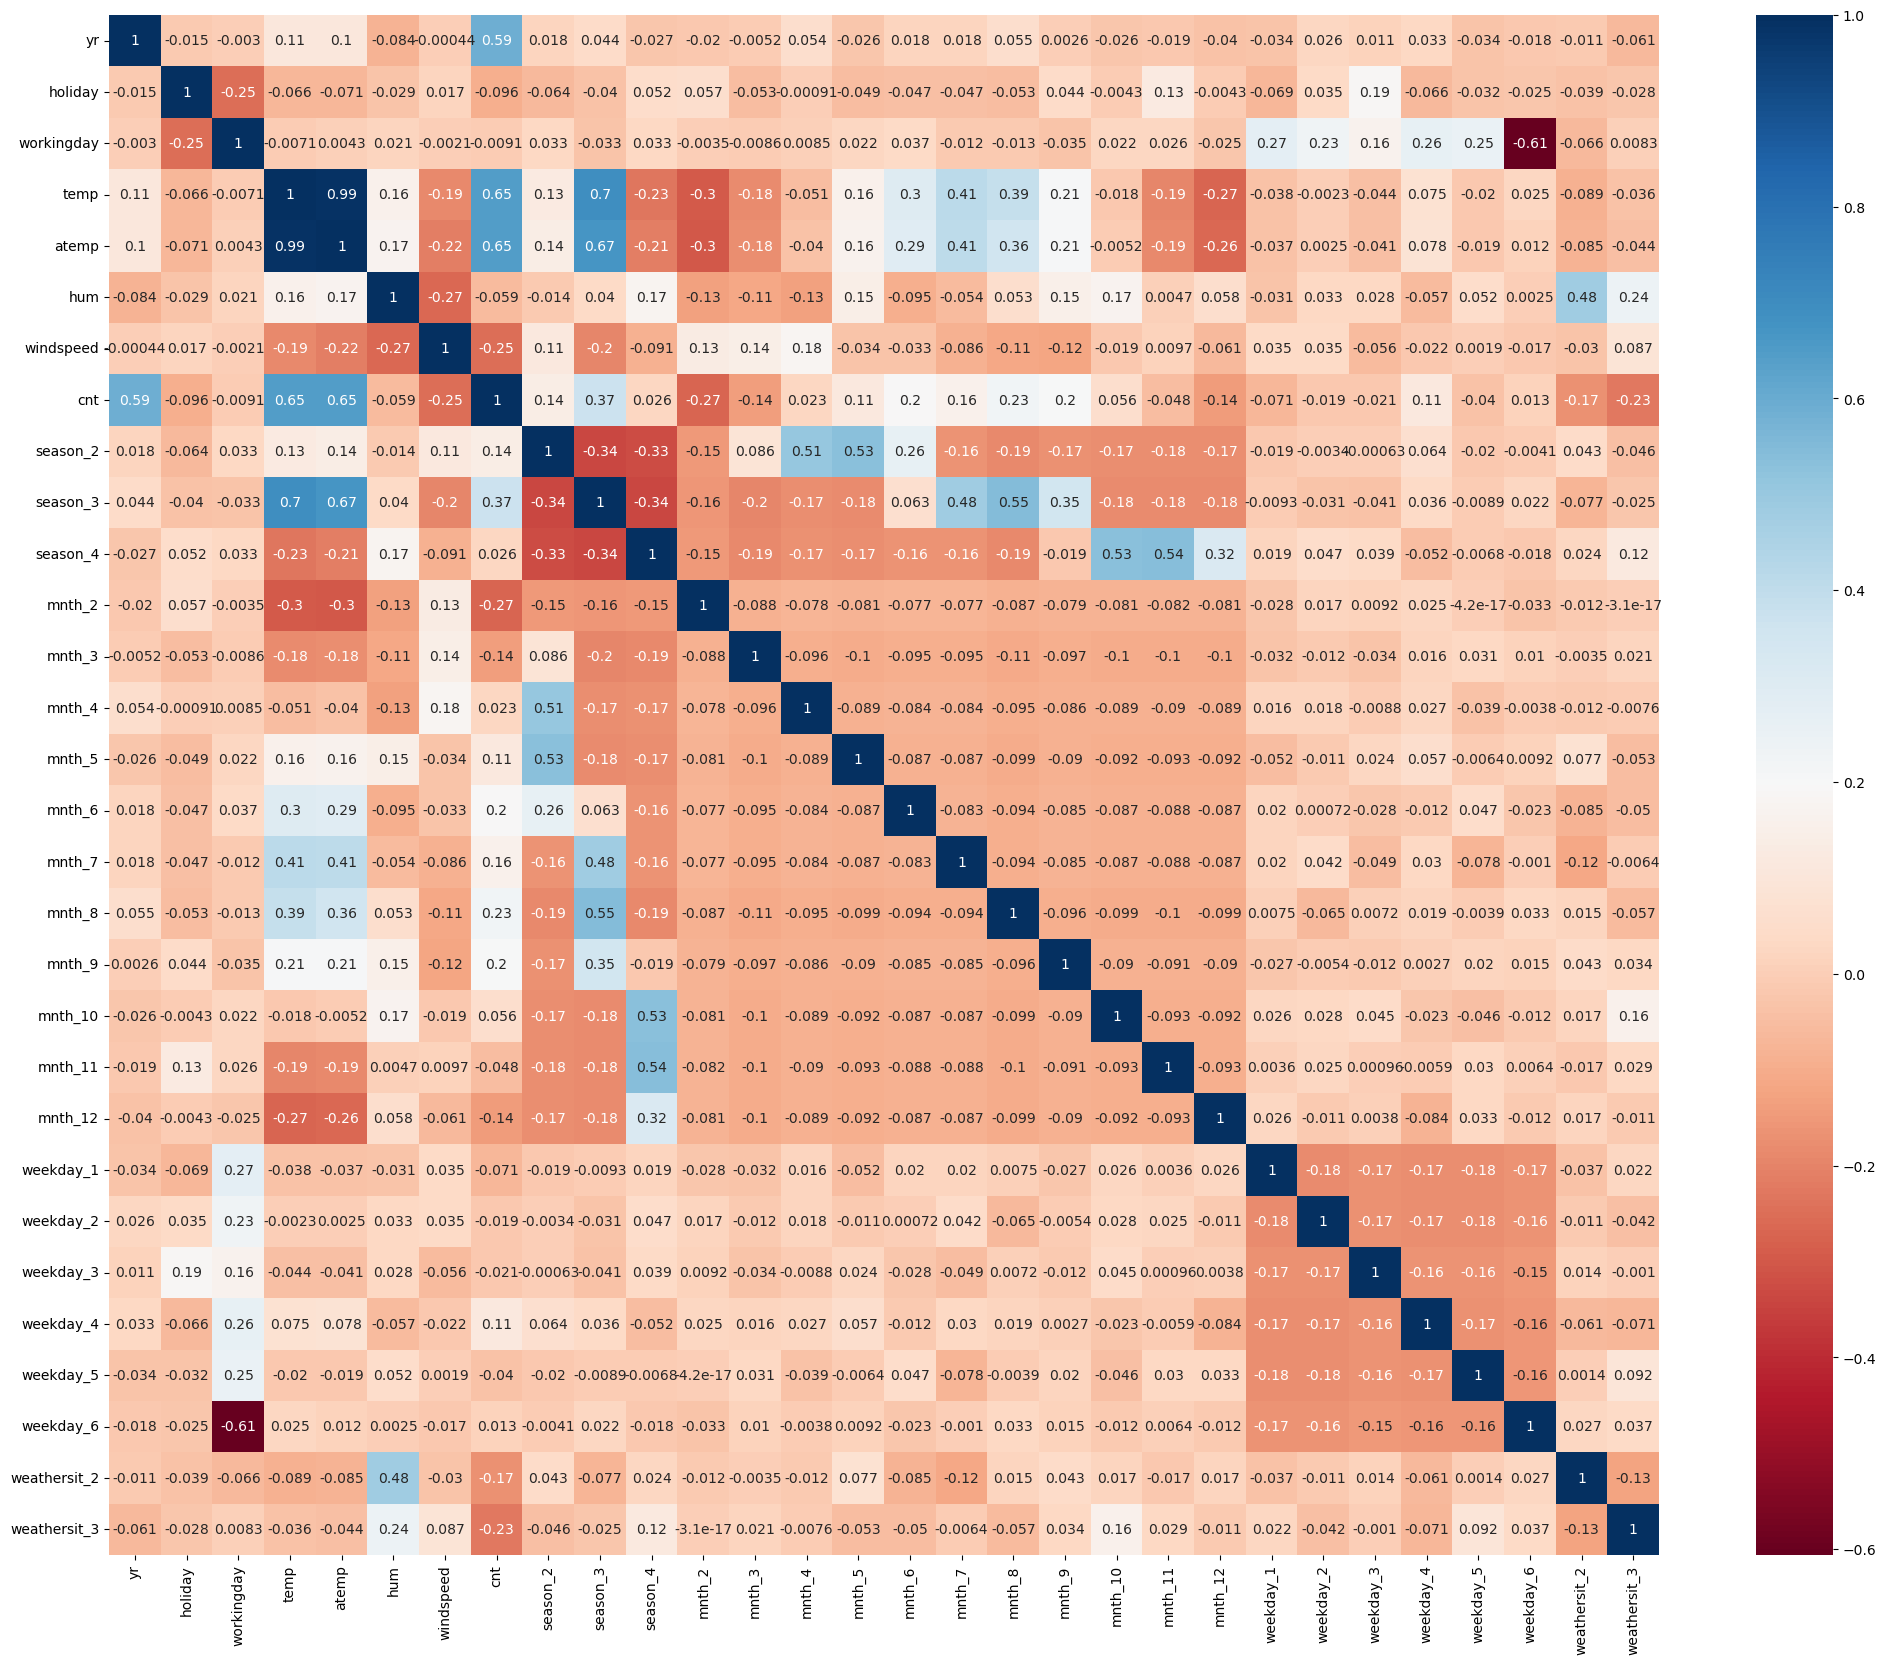

In [72]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering (dataframe: df_train)

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

# Insights:

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
#Use minmaxscaler method for rescaling

#Apply scaler() to all the numeric variables

#1.instantaite an object 

scaler = MinMaxScaler()

#create list of numeric variables 

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#2.fit on data 

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [76]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


# STEP 5: Training the model

BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [77]:
y_train = df_train.pop('cnt')
X_train = df_train

In [80]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

RFE Recursive feature elimination

In [81]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Building Linear Model using 'STATS MODEL'¶

# Model 1

VIF Check

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


In [88]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [89]:
# Check the parameters obtained

lr1.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

In [90]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.00e-188
Time:                        19:52:51   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665   

# Model 2

Removing the variable 'mnth_5' based on its High VIF (0.115)


In [92]:
X_train_new = X_train_rfe.drop(["mnth_5"], axis = 1)

Checking VIF after droping 'mnth_5' column

In [93]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.53
7,season_4,3.05
12,weathersit_2,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.63


In [94]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [95]:
# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [96]:
# Check the parameters obtained
lr2.params

const           0.232239
yr              0.229774
holiday        -0.090038
temp            0.496526
hum            -0.171899
windspeed      -0.185786
season_2        0.122505
season_3        0.036114
season_4        0.150156
mnth_3          0.027934
mnth_8          0.050457
mnth_9          0.120186
mnth_10         0.039287
weathersit_2   -0.054371
weathersit_3   -0.244911
dtype: float64

In [97]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          2.46e-189
Time:                        20:02:47   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525   

# Model 3

Removing the variable 'season_3' based on its High 'VIF' value and high p-value

In [98]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [99]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,season_4,2.32
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.84
8,mnth_8,1.61
10,mnth_10,1.60
9,mnth_9,1.34


In [100]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [101]:
lr3.params

const           0.232586
yr              0.228689
holiday        -0.091705
temp            0.537143
hum            -0.180550
windspeed      -0.189317
season_2        0.105884
season_4        0.139280
mnth_3          0.023293
mnth_8          0.060488
mnth_9          0.129246
mnth_10         0.035508
weathersit_2   -0.053215
weathersit_3   -0.240076
dtype: float64

In [102]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          5.94e-190
Time:                        20:09:57   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525   

# Model 4

Removing the variable 'mnth_3' based on its high P_value(0.101).

In [103]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [104]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,season_4,2.25
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.84
7,mnth_8,1.60
9,mnth_10,1.60
8,mnth_9,1.34


In [105]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [106]:
# Check the parameters obtained

lr4.params

const           0.239027
yr              0.228857
holiday        -0.094111
temp            0.531625
hum            -0.181797
windspeed      -0.186835
season_2        0.105803
season_4        0.135308
mnth_8          0.058540
mnth_9          0.127705
mnth_10         0.035821
weathersit_2   -0.053105
weathersit_3   -0.238470
dtype: float64

In [107]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.49e-190
Time:                        20:13:53   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838   

# Model 5

Removing the variable 'hum' based on its high VIF '14.38'

In [108]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.93
4,season_2,1.83
6,mnth_8,1.59
8,mnth_10,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.10


In [110]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()


In [111]:
# Check the parameters obtained
lr5.params

const           0.134589
yr              0.232902
holiday        -0.095584
temp            0.509882
windspeed      -0.151673
season_2        0.102630
season_4        0.126600
mnth_8          0.056896
mnth_9          0.120773
mnth_10         0.031119
weathersit_2   -0.081965
weathersit_3   -0.286944
dtype: float64

In [112]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          9.45e-187
Time:                        20:18:12   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014   

# Model 6

Removing the variable 'mnth_10' based on its high p-value (0.082)

In [113]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.49
5,season_4,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


In [116]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [117]:
# Check the parameters obtained
lr6.params

const           0.130722
yr              0.232563
holiday        -0.096575
temp            0.517336
windspeed      -0.149709
season_2        0.101217
season_4        0.137090
mnth_8          0.054141
mnth_9          0.116291
weathersit_2   -0.081139
weathersit_3   -0.281852
dtype: float64

In [118]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          2.62e-187
Time:                        20:22:06   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837   

# Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


with R-squared: 0.834

     Adj. R-squared: 0.831
     
     F-statistic: 250.5
     
     Prob (F-statistic): 2.62e-187
     
and as all the coef are less than 1 , this model looks to be a good fit

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

In [120]:
y_train_pred = lr6.predict(X_train_lm6)

In [122]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

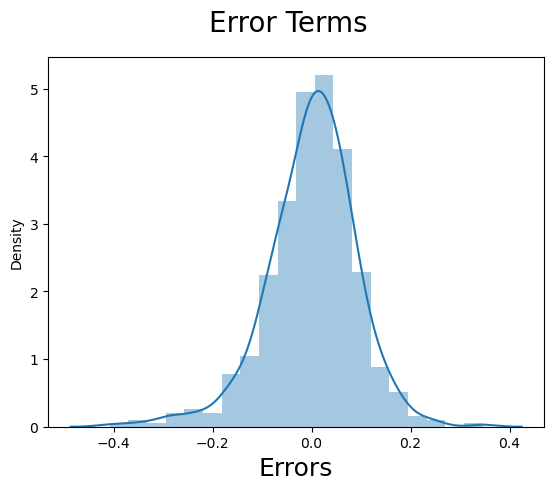

In [123]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Insights
From the above histogram, we could see that the Residuals are normally distributed. 
Hence our assumption for Linear Regression is valid

# Making Predictions

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

Applying the scaling on the test sets

In [124]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform.

In [125]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [126]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [128]:
y_test = df_test.pop('cnt')
X_test = df_test

In [132]:
# Now let's use our model to make predictions.

#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [133]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

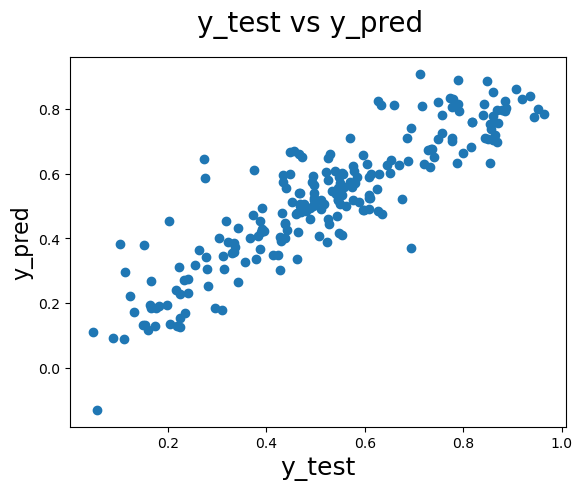

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# R^2 Value for TEST

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7935224695104379

# Adjusted R^2 Value for TEST

In [136]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [137]:
# Get the shape of X_test
X_test.shape

(220, 10)

In [138]:
X_test.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_2,weathersit_3
184,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0,0.881625,0.339570,0,0,1,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0


As per our final Model, the top 3 predictor variables that influences the bike booking are:


1)Temperature (temp) - A coefficient value of ‘0.5173’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5173 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2819’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2819 units.

3)Year (yr) - A coefficient value of ‘0.2326’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2326 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are

season_4: - A coefficient value of ‘0.1371’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1371 units.
windspeed: - A coefficient value of ‘-0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1497 units.

#### NOTE:

The details of weathersit_1 & weathersit_3

weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy

weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The details of season1 & season4

season1: spring

season4: winter